# Visualizing and Analyzing the Word Embeddings of Fed2Vec
## by Ancil Crayton

This notebook covers loading the Fed2Vec model and embedding vectors, reduce the dimensionality using tSNE, and plotting the words in a vector space. I follow this by showing examples of how to analyze similar terms within the training corpus based on cosine similarity.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models.doc2vec import Doc2Vec
from sklearn.manifold import TSNE
%matplotlib inline

In [2]:
# Load trained model
model = Doc2Vec.load("../results/fed2vec.model")

In [55]:
# Create dataset to reduce dimensionality
X = model[model.wv.vocab]
# See the shape
X.shape

(22240, 300)

In [4]:
# Initialize tSNE and create reduced dimension matrix
tsne = TSNE(n_components=2)
reduced = tsne.fit_transform(X)

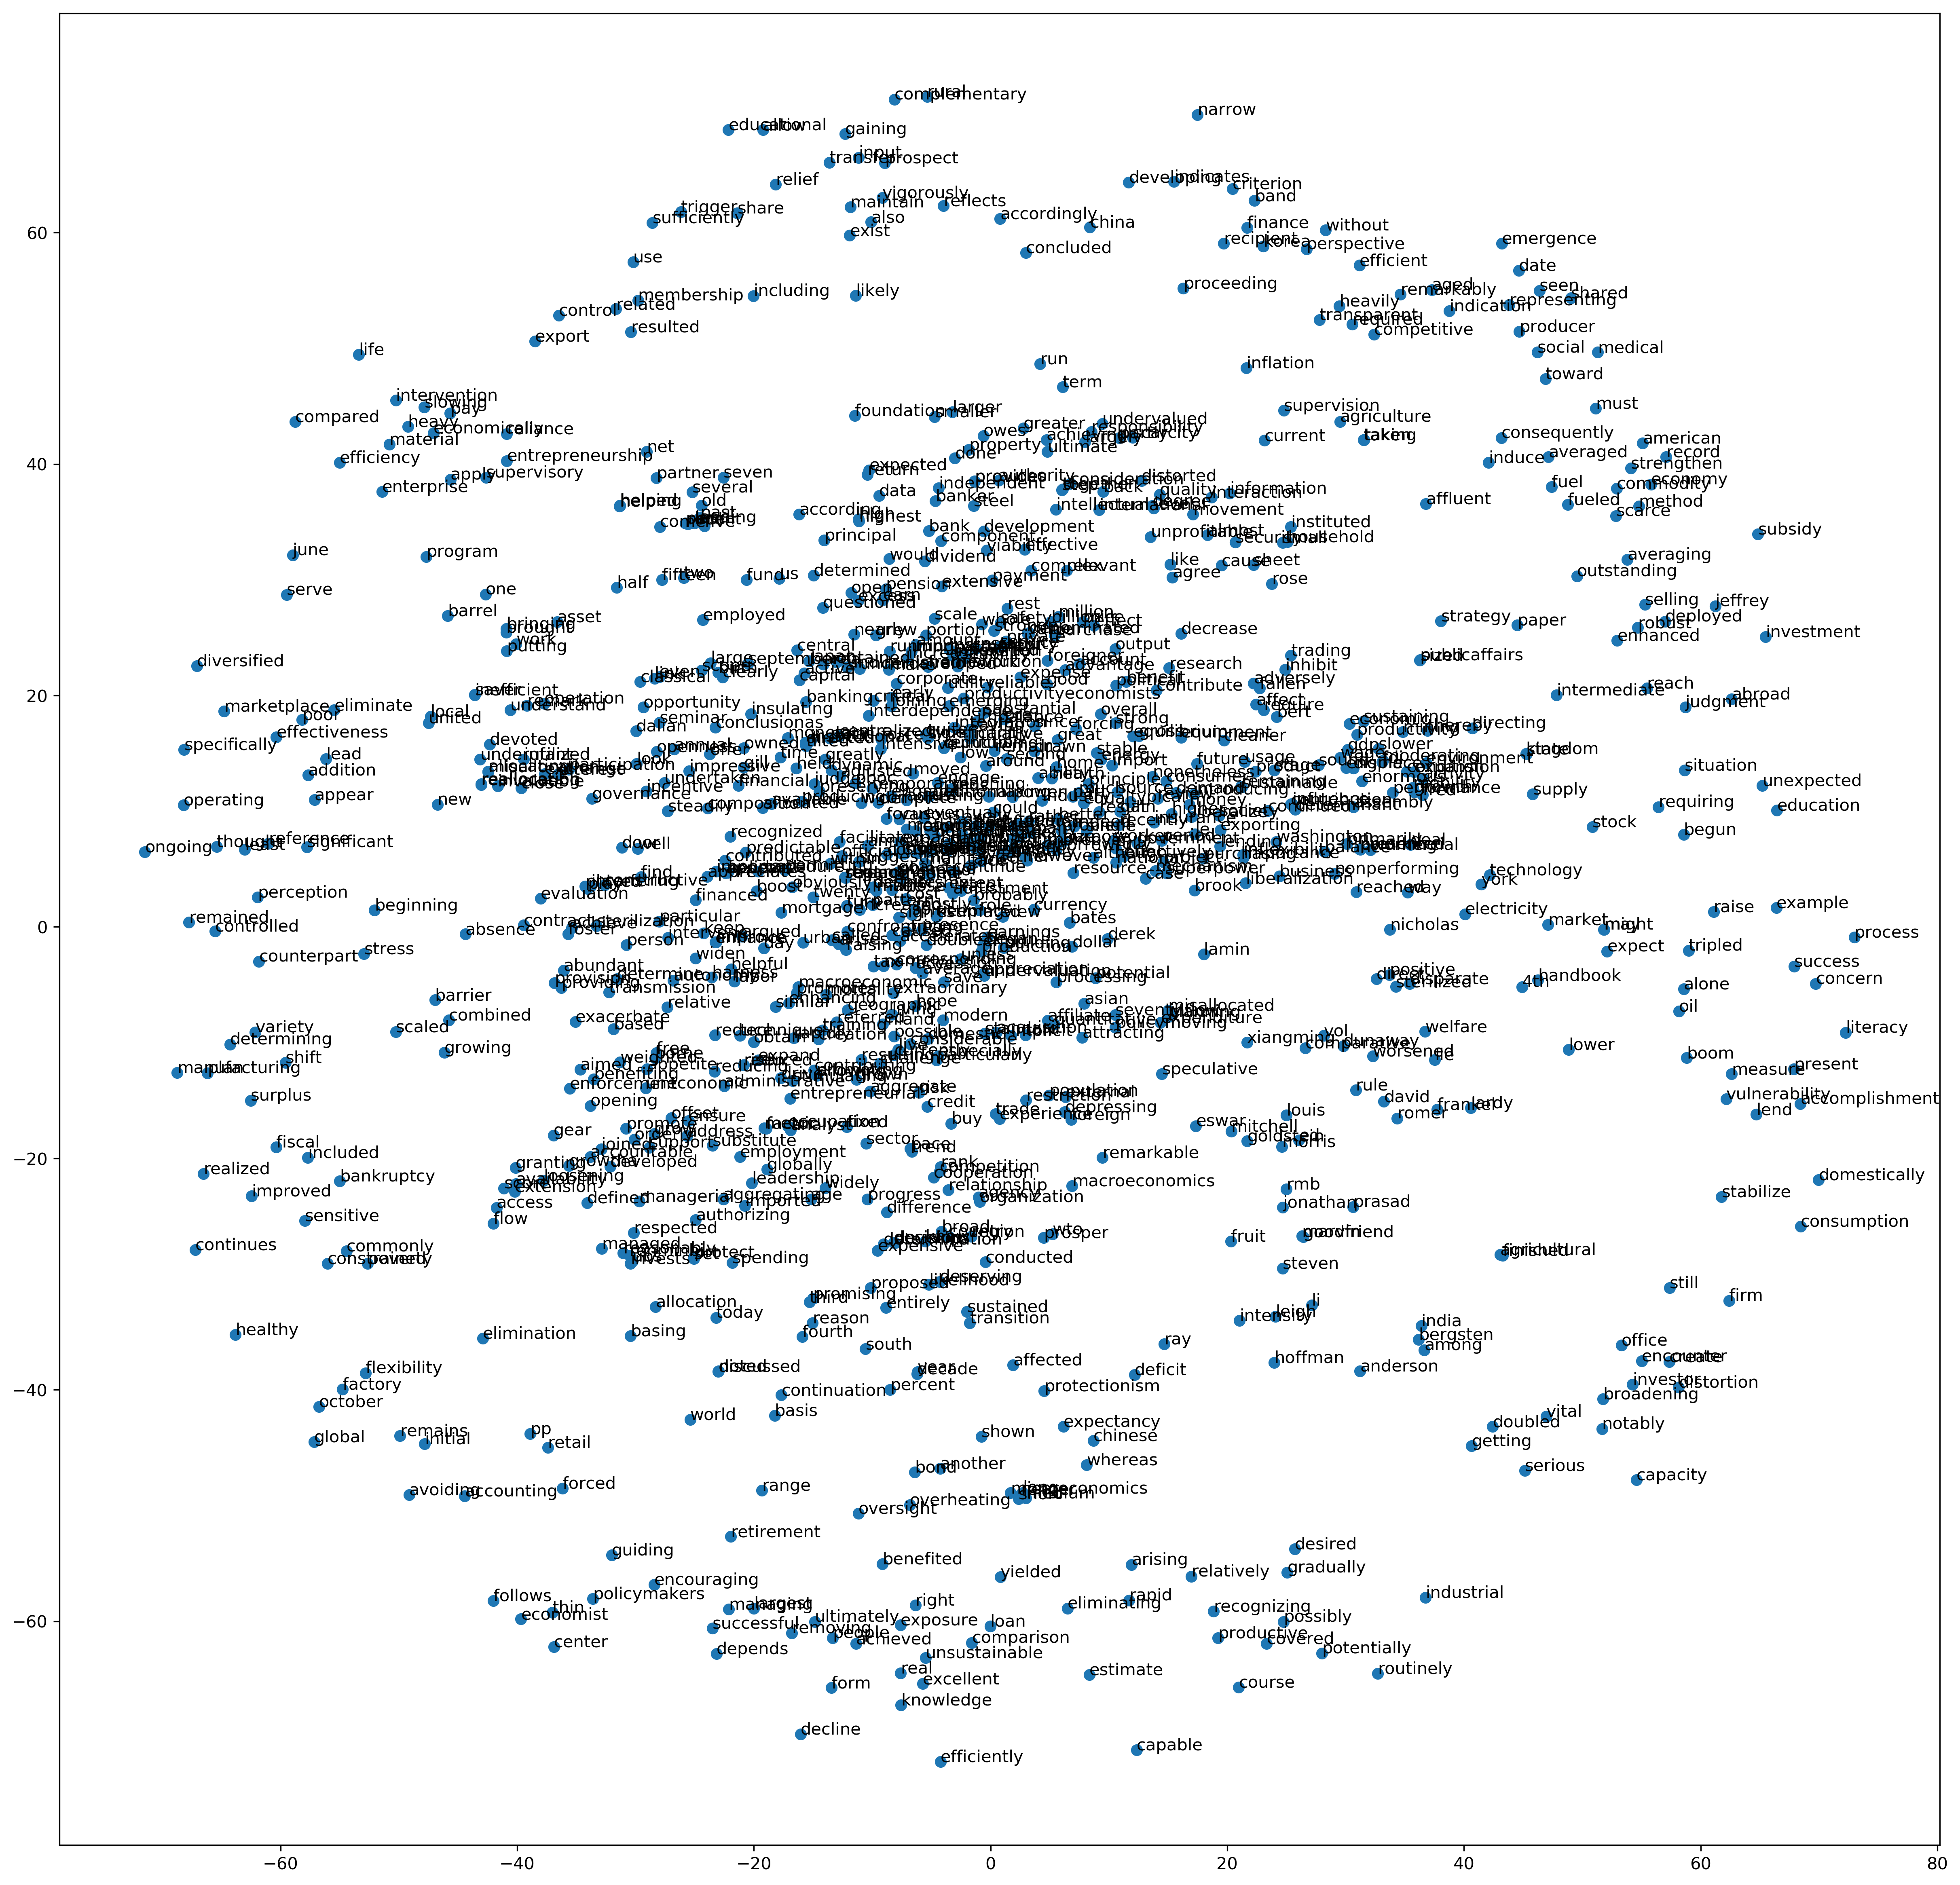

In [68]:
# Create scatter plot of the top 1000 most frequent words in the two-dimensional vector space
plt.figure(figsize=(20, 20), dpi=300)
plt.scatter(reduced[:1000, 0], reduced[:1000, 1])
words = list(model.wv.vocab)[:1000]
for i, word in enumerate(words):
    plt.annotate(word, xy=(reduced[i, 0], reduced[i, 1]))
plt.show()

## Exploring word embeddings by cosine similarity

In [43]:
# Words embedded near 'increase'
model.wv.most_similar(positive=['increase'])

[('rise', 0.3837185502052307),
 ('decline', 0.3714974522590637),
 ('increased', 0.361308217048645),
 ('reduce', 0.3314908742904663),
 ('reduction', 0.3184376358985901),
 ('drop', 0.3055817484855652),
 ('decrease', 0.30322790145874023),
 ('renormalization', 0.3028069734573364),
 ('boost', 0.28942617774009705),
 ('reduced', 0.2796323895454407)]

In [44]:
# Words embedded near 'stability'
model.wv.most_similar(positive=['stability'])

[('mitsui', 0.3669223189353943),
 ('demo', 0.33781033754348755),
 ('restatementsrisks', 0.3244696855545044),
 ('hegemon', 0.3202987015247345),
 ('folly', 0.3192131817340851),
 ('virtu', 0.318511426448822),
 ('system9', 0.3150712251663208),
 ('imbed', 0.3139832615852356),
 ('authoritiesglobalization', 0.31357818841934204),
 ('snl', 0.31260326504707336)]

In [39]:
# Words embedded near 'crisis'
model.wv.most_similar(positive=['crisis'])

[('hegemon', 0.3530466556549072),
 ('instabilitythe', 0.35218238830566406),
 ('turmoilas', 0.3484254479408264),
 ('napoleonic', 0.34610000252723694),
 ('baron', 0.3452569544315338),
 ('restatementsrisks', 0.34295913577079773),
 ('turmoiloverall', 0.32869428396224976),
 ('repression', 0.3260241448879242),
 ('turmoilfortunately', 0.3242771625518799),
 ('demo', 0.3241034746170044)]

In [53]:
# Words embedded near 'statistic'
model.wv.most_similar(positive='statistic')

[('data', 0.2701261639595032),
 ('atomistic', 0.2542649209499359),
 ('bok', 0.24200066924095154),
 ('hvs', 0.23301386833190918),
 ('nudge', 0.22745466232299805),
 ('administratively', 0.22050423920154572),
 ('monthly', 0.21730585396289825),
 ('dictionary', 0.21058370172977448),
 ('opportunity', 0.21020463109016418),
 ('obverse', 0.20975154638290405)]

In [16]:
# Words embedded near 'reduce'
model.wv.most_similar(positive='reduce')

[('diminish', 0.36810731887817383),
 ('heighten', 0.34188538789749146),
 ('mitigate', 0.34143394231796265),
 ('reducing', 0.3382723331451416),
 ('eradicate', 0.3321288228034973),
 ('increase', 0.3314908444881439),
 ('lessen', 0.32903072237968445),
 ('reduces', 0.31800293922424316),
 ('boost', 0.31226998567581177),
 ('insulate', 0.30812931060791016)]

In [48]:
# Words embedded near 'accelerate'
model.wv.most_similar(positive='accelerate')

[('complicate', 0.31298959255218506),
 ('shelter', 0.30357542634010315),
 ('rousing', 0.29861533641815186),
 ('dimitrios', 0.28565001487731934),
 ('impede', 0.2806752622127533),
 ('impacted', 0.2804824709892273),
 ('circulates', 0.2761743664741516),
 ('upsurge', 0.2688119113445282),
 ('miserable', 0.2666826844215393),
 ('perpetuate', 0.2640676498413086)]